# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [104]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [105]:
# Import dataset
# Your code here
data = pd.read_csv("data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [106]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
data = data.sample(5000,random_state=101)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 20209 to 14281
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [107]:
# Let's take a look at first 5 rows ()
# Your code here
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7136,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22572,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [108]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
data['label'].unique()

array([1, 3, 0, 9, 5, 6, 7, 2, 4, 8], dtype=int64)

In [109]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
# X = data.drop(columns="label")
X = data.drop("label",axis=1).values
y = data['label'].values


In [110]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)



## 2. Visualization

Label: 1


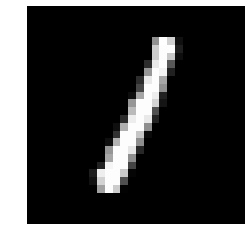

In [111]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 36
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

## 3. Modeling

In [112]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=101)


In [113]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train,y_train)

C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [114]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## 4. Evaluate model

In [115]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
rfc_predict = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       127
           1       0.91      0.96      0.93       154
           2       0.86      0.85      0.86       126
           3       0.82      0.86      0.84       107
           4       0.83      0.92      0.87       119
           5       0.91      0.77      0.84        97
           6       0.93      0.96      0.94       121
           7       0.87      0.85      0.86       125
           8       0.90      0.84      0.87       129
           9       0.85      0.79      0.82       145

   micro avg       0.88      0.88      0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250



In [116]:
# Decision Tree model
# Your code here
dtc_predict = dtc.predict(X_test)
print(classification_report(y_test,dtc_predict))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       127
           1       0.91      0.90      0.91       154
           2       0.78      0.78      0.78       126
           3       0.65      0.69      0.67       107
           4       0.70      0.78      0.74       119
           5       0.64      0.63      0.63        97
           6       0.79      0.78      0.78       121
           7       0.80      0.78      0.79       125
           8       0.71      0.66      0.68       129
           9       0.72      0.71      0.72       145

   micro avg       0.76      0.76      0.76      1250
   macro avg       0.76      0.76      0.76      1250
weighted avg       0.76      0.76      0.76      1250



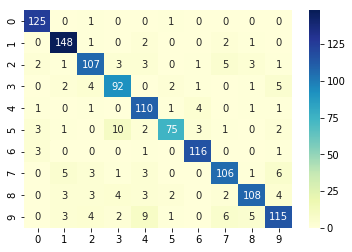

In [117]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
rfc_cm = confusion_matrix(y_test,rfc_predict)

sns.heatmap(rfc_cm ,cmap="YlGnBu", annot=True, fmt="d")



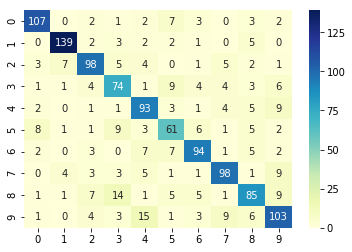

In [118]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here

dtc_cm = confusion_matrix(y_test,dtc_predict)

sns.heatmap(dtc_cm ,cmap="YlGnBu", annot=True, fmt="d")

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

[0.6408, 0.8336, 0.8816, 0.916, 0.9336, 0.9376, 0.9448, 0.948]


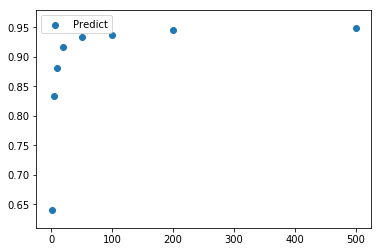

In [119]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i, random_state=101)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test,predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(x=n,y=result,label="Predict" )
plt.xlabel = "Estimator"
plt.ylabel= "Accuracy"
plt.legend();
print(result)

## Great job!

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 101)
# Create the parameter grid based on the results of random search 
param_grid = {
     'bootstrap': [True],
     'max_depth': [80, 90, 100, 110],
     'max_features': [2, 3,4],
     'min_samples_leaf': [3, 4, 5],
     'min_samples_split': [4, 8, 12],
    'n_estimators': [10, 50, 100,200,500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


In [122]:
best_grid = grid_search.best_estimator_


In [123]:
grid_search.best_score_

0.9266666666666666